In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from math import ceil, floor

random.seed(0)

## Finding the most specific/general hypothesis [Warm-UP]

In [2]:
# utilities for creating a dataset

### data structure to represent dataset
class Dataset:
    def __init__(self, x: np.ndarray, y: np.ndarray, n = None):
        # todo: assertion to verify the dimension of x and y
        self.__x = x
        self.__y = y
        self.__n = n if n else len(x)
    
    @property
    def x(self):
        return self.__x

    @property
    def y(self):
        return self.__y
        
    def __getitem__(self, index: int):
        #todo: assertion to verify out of bounds
        return self.__x[index], self.__y[index]
    
    def __setitem__(self, index: int, x_: np.ndarray, y_: np.ndarray):
        # todo: assertion to verify out of bounds
        self.__x[index] = x_
        self.__y[index] = y_
    
    def __len__(self):
        return self.__n
    
    def __del__(self):
        del(self.__x)
        del(self.__y)
        del(self.__n)
    
    def __iter__(self):
        self.__index = 0
        return self
    
    def __next__(self):
        if (self.__index < self.__n):
            self.__index += 1
            return self[self.__index - 1]
        raise StopIteration

### helper functions
def binary_sampling(p: float) -> int:
    # todo: assertion to verify validity of p
    value = random.choices([1, 0], [p, 1-p])[0]
    return value


def uniform_range_sampling(union_of_ranges: list) -> float:
    # make assertions about correctness of union_of_ranges
    total_length = sum([(upper-lower) for lower, upper in union_of_ranges])
    uniform_sample = random.uniform(0, total_length)

    for lower, upper in union_of_ranges:
        uniform_sample += lower
        if (uniform_sample < upper):
            return uniform_sample
        uniform_sample -= upper

    return None


def x_sampling(x_range: dict, y: np.ndarray):
    x = np.array([[uniform_range_sampling(union_of_ranges) for union_of_ranges in x_range[target]] for target in y])    
    return x

In [3]:
# creating a dataset

### setting up parameters required
n = 30 # dataset-size
p = 0.5 # probability of 1
x_range = {1: [[(2, 7),], [(4, 6),]], 0: [[(0, 2), (7, 9)], [(1, 3), (6, 8)]]}


def create_dataset(n, p, x_range):
    ### generating vector y
    y = np.array([binary_sampling(p) for _ in range(n)])

    ### generating vector x
    x = x_sampling(x_range, y)
    
    return Dataset(x, y)

dataset = create_dataset(n, p, x_range)

In [4]:
# printing the dataset
for x, y in dataset:
    print(x, y)

[1.90803911 7.46123971] 0
[1.04196924 7.22011131] 0
[4.74349652 4.0280834 ] 1
[5.59852343 4.79764708] 1
[8.29937991 6.6726128 ] 0
[2.0057141  4.98715573] 1
[8.4704111  1.97564351] 0
[3.62602181 5.74094246] 1
[2.95533546 5.13502148] 1
[0.95446371 7.870161  ] 0
[8.21271788 2.79187829] 0
[0.32178327 2.28021842] 0
[4.53970321 5.86566765] 1
[0.43623138 6.20506898] 0
[7.82624564 6.18976365] 0
[6.07233432 5.08056721] 1
[8.85535418 6.41274251] 0
[7.35046826 2.77995611] 0
[7.38514745 2.53960458] 0
[7.30260406 2.16131801] 0
[2.94695664 4.37345906] 1
[7.45109272 6.62663756] 0
[1.90612397 1.35929744] 0
[8.03041569 7.50708148] 0
[6.61690508 5.68492045] 1
[6.49086561 5.84616488] 1
[4.70299962 4.7825921 ] 1
[7.8211336  2.10253649] 0
[8.24651483 7.39794386] 0
[8.58015587 6.35920473] 0


#### 1. Plotting the dataset

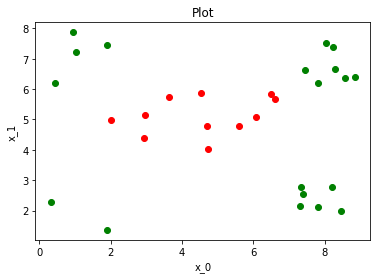

In [5]:
### setting up parameters required
color_code = {1: 'red', 0: 'green'}

### function for plotting dataset
def plot_dataset(ax, dataset: Dataset):
    for x, y in dataset:
        ax.scatter(*x, color = color_code[y])

fig = plt.figure()
ax = fig.add_subplot(111)
plot_dataset(ax, dataset)

plt.title('Plot')
plt.xlabel('x_0')
plt.ylabel('x_1')

plt.show()

####  Before proceeding to 2nd part, let us create data structures to represent and plot cartesian coordinates, circle and rectange

In [6]:
'''
An axis aligned rectangle can be uniquely identified by a pair of diagonally opposite vertices

A circle can be uniquely identified by a center and a radius
'''

PRECISION = 1e-9
INF = 1e5

### Data Structure to represent a point, an axis-aligned rectangle and a circle
class Point:
    def __init__(self, x: float, y: float):
        self.__x = y
        self.__y = y
        self.__coordinates = [x, y]
    
    @property
    def x(self) -> float:
        return self.__coordinates[0]
    
    @property
    def y(self) -> float:
        return self.__coordinates[1]
    
    @property
    def coordinates(self) -> list:
        return self.__coordinates
    
    @coordinates.setter
    def coordinates(self, value: list):
        self.__coordinates = value
        self.__x, self.__y = value
        
    @x.setter
    def x(self, value: float):
        self.__x = value
        self.__coordinates[0] = value
    
    @y.setter
    def y(self, value: float):
        self.__y = value
        self.__coordinates[1] = value
    
    def __repr__(self) -> str:
        return str(list(map(lambda n: '%.2f'%n, self.__coordinates)))
    
    def __del__(self):
        del(self.__coordinates)

class Rectangle:
    def __init__(self, low: list = None, high: list = None):
        self.__low = Point(*low) if low else Point(0, 0)
        self.__high = Point(*high) if high else Point(0, 0)
        
    @property
    def low(self):
        return self.__low
    
    @property
    def high(self):
        return self.__high
    
    @property
    def left(self):
        return self.__low.x
    
    @property
    def right(self):
        return self.__high.x
    
    @property
    def bottom(self):
        return self.__low.y
    
    @property
    def top(self):
        return self.__high.y
    
    @property
    def width(self):
        return self.__high.x - self.__low.x
    
    @property
    def height(self):
        return self.__high.y - self.__low.y
    
    @low.setter
    def low(self, value: list):
        self.__low.coordinates = value
        
    @high.setter
    def high(self, value: list):
        self.__high.coordinates = value
    
    @left.setter
    def left(self, value: float):
        self.__low.x = value
    
    @right.setter
    def right(self, value: float):
        self.__high.x = value
    
    @bottom.setter
    def bottom(self, value: float):
        self.__low.y = value
    
    @top.setter
    def top(self, value: float):
        self.__high.y = value
        
    def contains(self, x, y):
        # returns true if point strictly lies inside
        if (y >= self.top or y <= self.bottom):
            return False
        if (x >= self.right or x <= self.left):
            return False
        return True
    
    def plot(self, ax, color='black'):
        if (self.height == float('inf') and self.width == float('inf')):
            return
        if (self.height == float('inf')):
            ax.axvline(x=self.left, color=color)
            ax.axvline(x=self.right, color=color)
            return
        if (self.width == float('inf')):
            ax.axhline(y=self.top, color=color)
            ax.axhline(y=self.bottom, color=color)
            return
        rect = patches.Rectangle((self.left, self.bottom), self.width, self.height, color=color)
        rect.set_fill(False)
        ax.add_patch(rect)
    
    def __repr__(self):
        return f'''Rectangle Vertices:
({self.__low.x: .2f}, {self.__high.y: .2f})\t({self.__high.x: .2f}, {self.__high.y: .2f})
({self.__low.x: .2f}, {self.__low.y: .2f})\t({self.__high.x: .2f}, {self.__low.y: .2f})
'''
    
    def __del__(self):
        del(self.__low)
        del(self.__high)
        
class Circle:
    def __init__(self, center: list = None, radius: float = None):
        self.__center = Point(*center) if center else Point(0, 0)
        self.__radius = radius if radius else 0
    
    def construct_from_three_points(self, p1: list, p2: list, p3: list):
        # using complex numbers to represent points for ease
        p1 = complex(*p1)
        p2 = complex(*p2)
        p3 = complex(*p3)
        
        # midpoints of two chords
        mid12 = (p1+p2)/2
        mid23 = (p2+p3)/2
        
        # unit vectors orthogonal to the two chords
        orth12 = (p1-p2)*(1j) / abs(p1-p2)
        orth23 = (p2-p3)*(1j) / abs(p2-p3)
        
        # check if orth12 and orth23 have acute angle between them, else flip any one
        dot_product = orth12.real * orth23.real + orth12.imag * orth23.imag
        if (dot_product < 0):
            orth23 *= -1
        
        # finding the center of the circle
        t = (mid23 - mid12) / (orth12 - orth23)
        center = mid12 + t*orth12
        radius = abs(center - p1)
        
        # updating parameters for the object
        self.center = ([center.real, center.imag])
        self.radius = (radius)
        
    def construct_from_diameter_endpoints(self, p1: list, p2: list):
        # using complex numbers to represent points for ease
        d1, d2 = complex(*p1), complex(*p2)
        
        # finding center and radius
        center = (d1+d2)/2
        radius = abs((d1-d2)/2)
        center = [center.real, center.imag]
        
        # updating parameters for the object
        self.center = center
        self.radius = radius
        
    def expand_with_center_fixed(self, dataset: Dataset):
        '''
        expands the circle as much as it can without getting any negative point inside the circle
        returns the point touched by the circle
        '''
        self.radius = float('inf')
        center = complex(self.center.x, self.center.y)
        
        closest_point = None
    
        for ((x, y), t) in dataset:
            if (t == 1): continue
            distance = abs(complex(x, y) - center)
            if (distance < self.radius):
                self.radius = distance
                closest_point = [x, y]
        
        return closest_point
        
    def expand_with_point_fixed(self, dataset: Dataset, point: list):
        '''
        the circle is expanded as much as it can with one of the points staying on the circle
        until the circle touches another point
        returns the two points being touched
        '''
        
        coordinates = lambda x: [x.real, x.imag]
        
        center = complex(self.center.x, self.center.y)
        point = complex(*point)
        unit_vector = (center - point) / abs(center - point)
        
        precision = PRECISION
        inf = INF
        
        lo, hi = 0, inf
        
        while (hi - lo > precision):
            mid = (hi + lo) / 2
            center = coordinates(point + unit_vector * (mid + self.radius))
            radius = self.radius + mid
            circle = Circle(center, radius)
            
            contains_neg = False
            for ((x, y), t) in dataset:
                if (t == 1 or complex(x, y) == point): continue
                if (circle.contains(x, y)):
                    contains_neg = True
                    break
            
            if (contains_neg):
                hi = mid
            else:
                lo = mid
        
        radius = self.radius

        self.radius += hi
        self.center = coordinates(point + unit_vector * (hi + radius))
        
        points_on_circle = []
        
        for ((x, y), t) in dataset:
                if (t == 1): continue
                if (self.contains(x, y)):
                    points_on_circle.append([x, y])
        
        self.radius += lo - hi
        self.center = coordinates(point + unit_vector * (lo + radius))
        
        return points_on_circle
    
    def expand_with_chord_fixed(self, dataset: Dataset, point1, point2):
        '''
        the circle is expanded keeping the chord defined by point1 and point2 as fixed
        until another point is touched
        in case the chord is already the diameter, nothing is done
        returns nothing
        '''
        
        coordinates = lambda x: [x.real, x.imag]
        get_radius = lambda x: (x ** 2 + abs((point2 - point1) / 2) ** 2) ** 0.5
        
        precision = PRECISION
        inf = INF        
        
        point1 = complex(*point1)
        point2 = complex(*point2)
        center = complex(self.center.x, self.center.y)
        
        if (abs(abs(point2 - point1) - 2*self.radius) < precision*10):
            return
        
        chord_mid = (point1 + point2) / 2
        unit_vector = (center - chord_mid) / abs(center - chord_mid)
        
        lo, hi = abs(center - chord_mid), inf
        
        while (hi - lo > precision):
            mid = (hi + lo) / 2
            center = coordinates(chord_mid + mid * unit_vector)
            radius = get_radius(mid)
            circle = Circle(center, radius)
            
            contains_neg = False
            for ((x, y), t) in dataset:
                if (t == 1 or complex(x, y) in [point1, point2]): continue
                if (circle.contains(x, y)):
                    contains_neg = True
                    break
            
            if (contains_neg):
                hi = mid
            else:
                lo = mid
        
        self.center = coordinates(chord_mid + lo * unit_vector)
        self.radius = get_radius(lo)
        
    
    @property
    def center(self):
        return self.__center
    
    @property
    def radius(self):
        return self.__radius
    
    @center.setter
    def center(self, value: list):
        self.__center = Point(*value)
    
    @radius.setter
    def radius(self, value: float):
        self.__radius = value
        
    def contains(self, x, y):
        p = complex(x, y)
        c = complex(self.center.x, self.center.y)
        if (abs(p-c) < self.__radius):
            return True
        return False
    
    def plot(self, ax, color = 'black'):
        circle = patches.Circle((self.center.x, self.center.y), self.radius, color=color)
        circle.set_fill(False)
        ax.add_patch(circle)
    
    def __repr__(self):
        return f'Circle => \tCenter: {self.__center}\tRadius: {self.__radius: .2f}'
    
    def __del__(self):
        del(self.__center)
        del(self.__radius)

#### 2. Hypothesis Class = Axis Aligned Rectangle

In [7]:
### function for most specific hypothesis with rectangle
def most_specific_rectangle(dataset: Dataset) -> Rectangle:
    
    # find some positive example from given dataset
    p_instance = None
    for ((x, y), t) in dataset:
        if (t == 1):
            p_instance = [x, y]
            break

    # initialize rectangle to be that point
    rect = Rectangle(p_instance, p_instance)
    
    # grow the rectangle to include all positive instances
    for ((x, y), t) in dataset:
        if (t == 0): continue
        if (x < rect.left): rect.left = x
        if (x > rect.right): rect.right = x
        if (y > rect.top): rect.top = y
        if (y < rect.bottom): rect.bottom = y
    return rect

In [8]:
### function for most general hypothesis with rectangle
def most_general_rectangle(dataset: Dataset) -> Rectangle:
    
    # initialize rectangle as the most specific hypothesis
    rect = most_specific_rectangle(dataset)
    
    # grow the rectangle in y direction as far as possible without including negatives
    y_top, y_bottom = rect.top, rect.bottom
    rect.top, rect.bottom = float('inf'), float('-inf')
    for ((x, y), t) in dataset:
        if (t == 1): continue
        if (rect.contains(x, y)):
            if (y > y_top):
                rect.top = min(rect.top, y)
            elif (y < y_bottom):
                rect.bottom = max(rect.bottom, y)
    
    # grow the rectangle in x direction as far as possible without including negatives
    x_right, x_left = rect.right, rect.left
    rect.right, rect.left = float('inf'), float('-inf')
    for ((x, y), t) in dataset:
        if (t == 1): continue
        if (rect.contains(x, y)):
            if (x > x_right):
                rect.right = min(rect.right, x)
            elif (x < x_left):
                rect.left = max(rect.left, x)
                
    return rect

In [9]:
spec_rect = most_specific_rectangle(dataset)
gen_rect = most_general_rectangle(dataset)

In [10]:
spec_rect

Rectangle Vertices:
( 2.01,  5.87)	( 6.62,  5.87)
( 2.01,  4.03)	( 6.62,  4.03)

In [11]:
gen_rect

Rectangle Vertices:
( 1.91,  inf)	( 7.30,  inf)
( 1.91, -inf)	( 7.30, -inf)

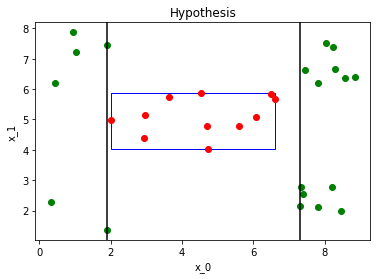

In [12]:
# plot
### most specific => blue
### most general => black
fig = plt.figure()
ax = fig.add_subplot(111)
spec_rect.plot(ax, 'blue')
gen_rect.plot(ax, 'black')
plot_dataset(ax, dataset)
plt.title('Hypothesis')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()

#### 2. Hypothesis Class = Circle

In [13]:
### function for most specific hypothesis with circle

def welzl(p1, p2 = []):

    if (len(p1) == 0):
        if (len(p2) == 0):
            return Circle()
        if (len(p2) == 1):
            return Circle(p2[0], 0)
        if (len(p2) == 2):
            c = Circle()
            c.construct_from_diameter_endpoints(*p2)
            return c

    if (len(p2) == 3):
        c = Circle()
        for i in range(3):
            for j in range(i+1, 3):
                c.construct_from_diameter_endpoints(p2[i], p2[j])
                if c.contains(*p2[3-i-j]):
                    return c
        c.construct_from_three_points(*p2)
        return c

    p = p1.pop()

    c = welzl(p1, p2.copy())
    if (c.contains(*p)):
        p1.append(p)
        return c

    p2.append(p)
    c = welzl(p1, p2.copy())
    p1.append(p)
    return c


def most_specific_circle(dataset: Dataset) -> Circle:
    pos = []
    for ((x, y), t) in dataset:
        if (t == 0): continue
        pos.append([x, y])
                
    random.shuffle(pos)
    
    circle = welzl(pos)
    return circle

In [14]:
### function for most general hypothesis with circle

def most_general_circle(dataset: Dataset, grow_further = False) -> Circle:
    #initialize circle of infinite radius cocentric to the most specific one
    circle = most_specific_circle(dataset)
    
    point = circle.expand_with_center_fixed(dataset)
    
    points = circle.expand_with_point_fixed(dataset, point)
    
    if (not grow_further):
        return circle
    
    if (point not in points):
        points.append(point)
    
    if (len(points) == 2):
        circle.expand_with_chord_fixed(dataset, *points)
        
    '''
    1. now move away from the point (along the point-center vector if one point on circle, else mid_chord-center if 
    two points), find distance t by which when center moved leads to intersection with a new point,
    move the center by t/2 in that direction. OR expand circle with that point fixed using binary search but
    then think about how to expand with chord fixed (maybe use angle subtended by chord)
    2. find largest radius now which can be accomodated
    
    repeat above steps until either condition is satisfied:
    a. 2 points on circle at diametrically opposite ends
    b. 3 points on circle
    '''
                
    return circle

In [15]:
spec_circle = most_specific_circle(dataset)
gen_circle = most_general_circle(dataset)

In [16]:
spec_circle

Circle => 	Center: ['4.31', '5.34']	Radius:  2.33

In [17]:
gen_circle

Circle => 	Center: ['4.41', '5.25']	Radius:  3.34

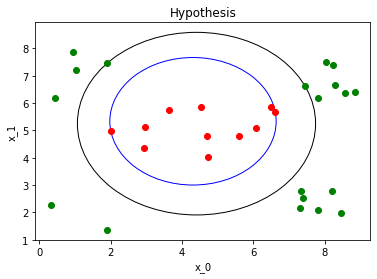

In [18]:
# plot
### most specific => blue
### most general => black
fig = plt.figure()
ax = fig.add_subplot(111)
spec_circle.plot(ax, 'blue')
gen_circle.plot(ax, 'black')
plot_dataset(ax, dataset)
plt.title('Hypothesis')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.show()

#### Observations

- Hypothesis Class = **Rectangle**
    - The most specific hypothesis in this case is a rectangle which just encloses the positive points
    - Any further compression in most specific rectangle will lead to false negatives
    - The most general hypothesis in this case is the rectangle which encloses all the positive points but further expansion will lead to false positives
    - It is interesting to note that rectangle is growing in height upto infinity. This is because there cannot be any value of x for which we can have both a negative and a positive sample as per the question specification as [2, 7] and [0, 2] U [7, 9] are disjoint intervals
    
- Hypothesis Class = **Circle**
    - The first two properties listed for rectangle carry forward for circle as well.
    - Unlike the case of rectangle, the circles are restricted in regions and not infinite.
    
*In both the above cases, most specific hypothesis contains the most general hypothesis*